In [1]:
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization
import matplotlib.cm as cm # Creating color bar
import matplotlib.colors as mcolors # Creating color bar
import seaborn as sns # data visualization
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import warnings # ignore warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import scipy.stats as stats

In [2]:
# Specify the full path to the CSV file
#file_path = r"C:\Users\poltr\OneDrive - udl.cat\Desktop\Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"
file_path = r"C:/Users/clara/OneDrive/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"
#file_path = r"C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Kandidat\Social Data Analysis and Visualization\Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# Preview the first 5 lines of the loaded data
df.head()

,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004
1,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004
3,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010
4,ASSAULT,TARAVAL,-122.470366,37.745158,15,Tuesday,2,April,2013


C:\Users\clara\AppData\Local\Temp\ipykernel_10796\339009546.py:91: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


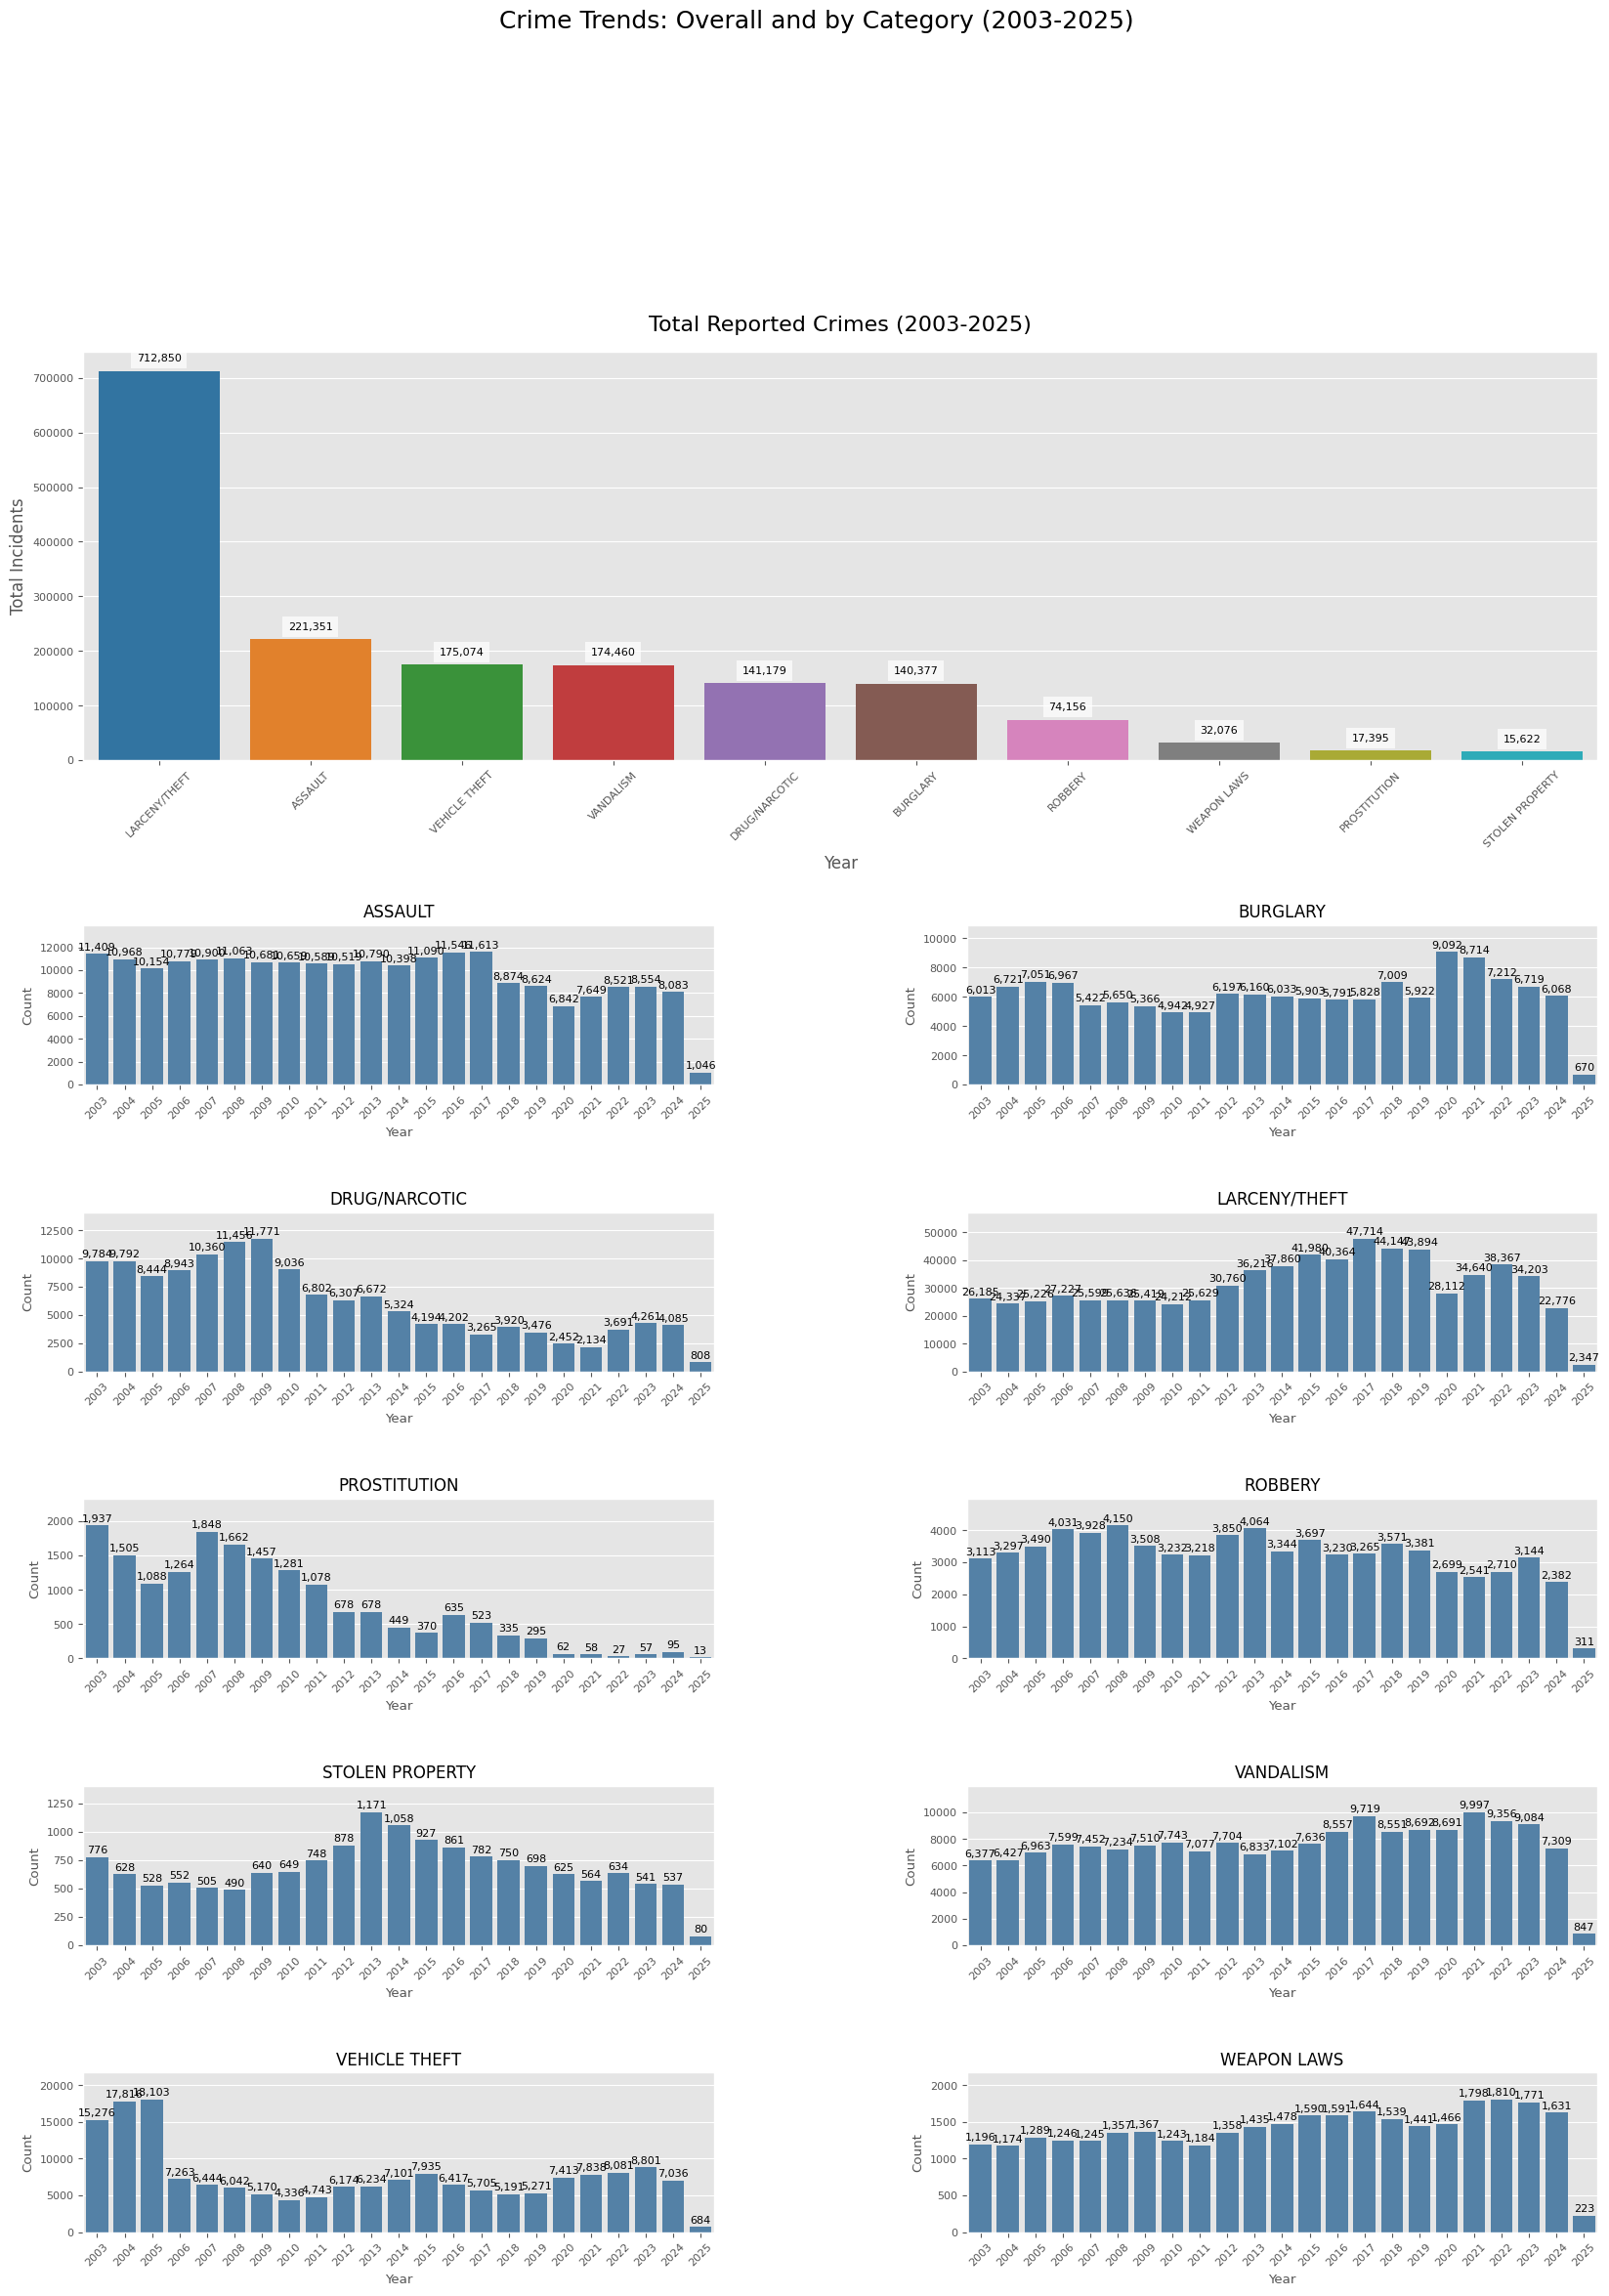

In [3]:
# Get crime counts by category
crime_counts = df['Category'].value_counts()
focuscrimes = set(['ROBBERY', 'VEHICLE THEFT', 'ASSAULT', 'BURGLARY', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 'WEAPON LAWS', 'PROSTITUTION', 'STOLEN PROPERTY'])
focus_data = df[df['Category'].isin(focuscrimes)]

plt.style.use('ggplot')
plt.rcParams['font.size'] = 8

# Create figure with proper spacing
fig = plt.figure(figsize=(20, 25))
fig.subplots_adjust(hspace=0.8, wspace=0.4)  # Increased spacing

# ----------------------------------
# 1. Top Plot - Overall Trend
# ----------------------------------
ax1 = fig.add_subplot(3, 1, 1)  # Now using 3 rows to prevent overlap
sns.barplot(x=crime_counts.index, y=crime_counts.values, 
            palette="tab10", ax=ax1)

ax1.set_title('Total Reported Crimes (2003-2025)', fontsize=16, pad=15)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Incidents', fontsize=12)
plt.xticks(rotation=45)

# Add data labels if space allows
for i, v in enumerate(crime_counts.values):
    ax1.text(i, v + (0.02 * crime_counts.max()), f"{v:,}",  # Dynamic offset
        ha='center', va='bottom',
        fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# ----------------------------------
# 2. Middle Section - Key Statistics
# ----------------------------------
ax2 = fig.add_subplot(3, 1, 2)
ax2.axis('off')  # Invisible axis for text

# Calculate summary stats
total_crimes = crime_counts.sum()
avg_per_year = crime_counts.mean()
trend = "↑ Increasing" if crime_counts[-1] > crime_counts[0] else "↓ Decreasing"

stats_text = f"""
Total Crimes (2003-2024): {total_crimes:,}
Average per Year: {avg_per_year:,.0f}
Trend: {trend}
"""
ax2.text(0.1, 0.5, stats_text, 
        fontsize=14, ha='left', va='center')

# ----------------------------------
# 3. Bottom Section - Category Breakdown
# ----------------------------------
n_rows = int(np.ceil(len(focuscrimes)/2))  # Dynamic rows calculation

for idx, crime in enumerate(sorted(focuscrimes), 1):
    ax = fig.add_subplot(n_rows + 2, 2, idx + 4)  # Adjusted positioning
    
    crime_data = focus_data[focus_data['Category'] == crime]
    if not crime_data.empty:
        yearly_counts = crime_data['Year'].value_counts().sort_index()
        sns.barplot(x=yearly_counts.index.astype(str),  # Ensure strings for categorical
                    y=yearly_counts.values, 
                    ax=ax, 
                    color='steelblue')
        
        # Dynamic Y-axis limit
        y_max = yearly_counts.max() * 1.2
        ax.set_ylim(0, y_max if not np.isnan(y_max) else 1000)
        
        ax.set_title(crime, fontsize=12)
        ax.set_ylabel('Count')
        plt.xticks(rotation=45)
        
        # Add data labels for non-zero bars
        for p in ax.patches:
            if p.get_height() > 0:
                ax.annotate(f"{int(p.get_height()):,}", 
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', 
                           xytext=(0, 5), 
                           textcoords='offset points',
                           fontsize=8)
    else:
        ax.text(0.5, 0.5, f"No data for {crime}", 
               ha='center', va='center')
        ax.set_title(crime, fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

plt.suptitle('Crime Trends: Overall and by Category (2003-2025)', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

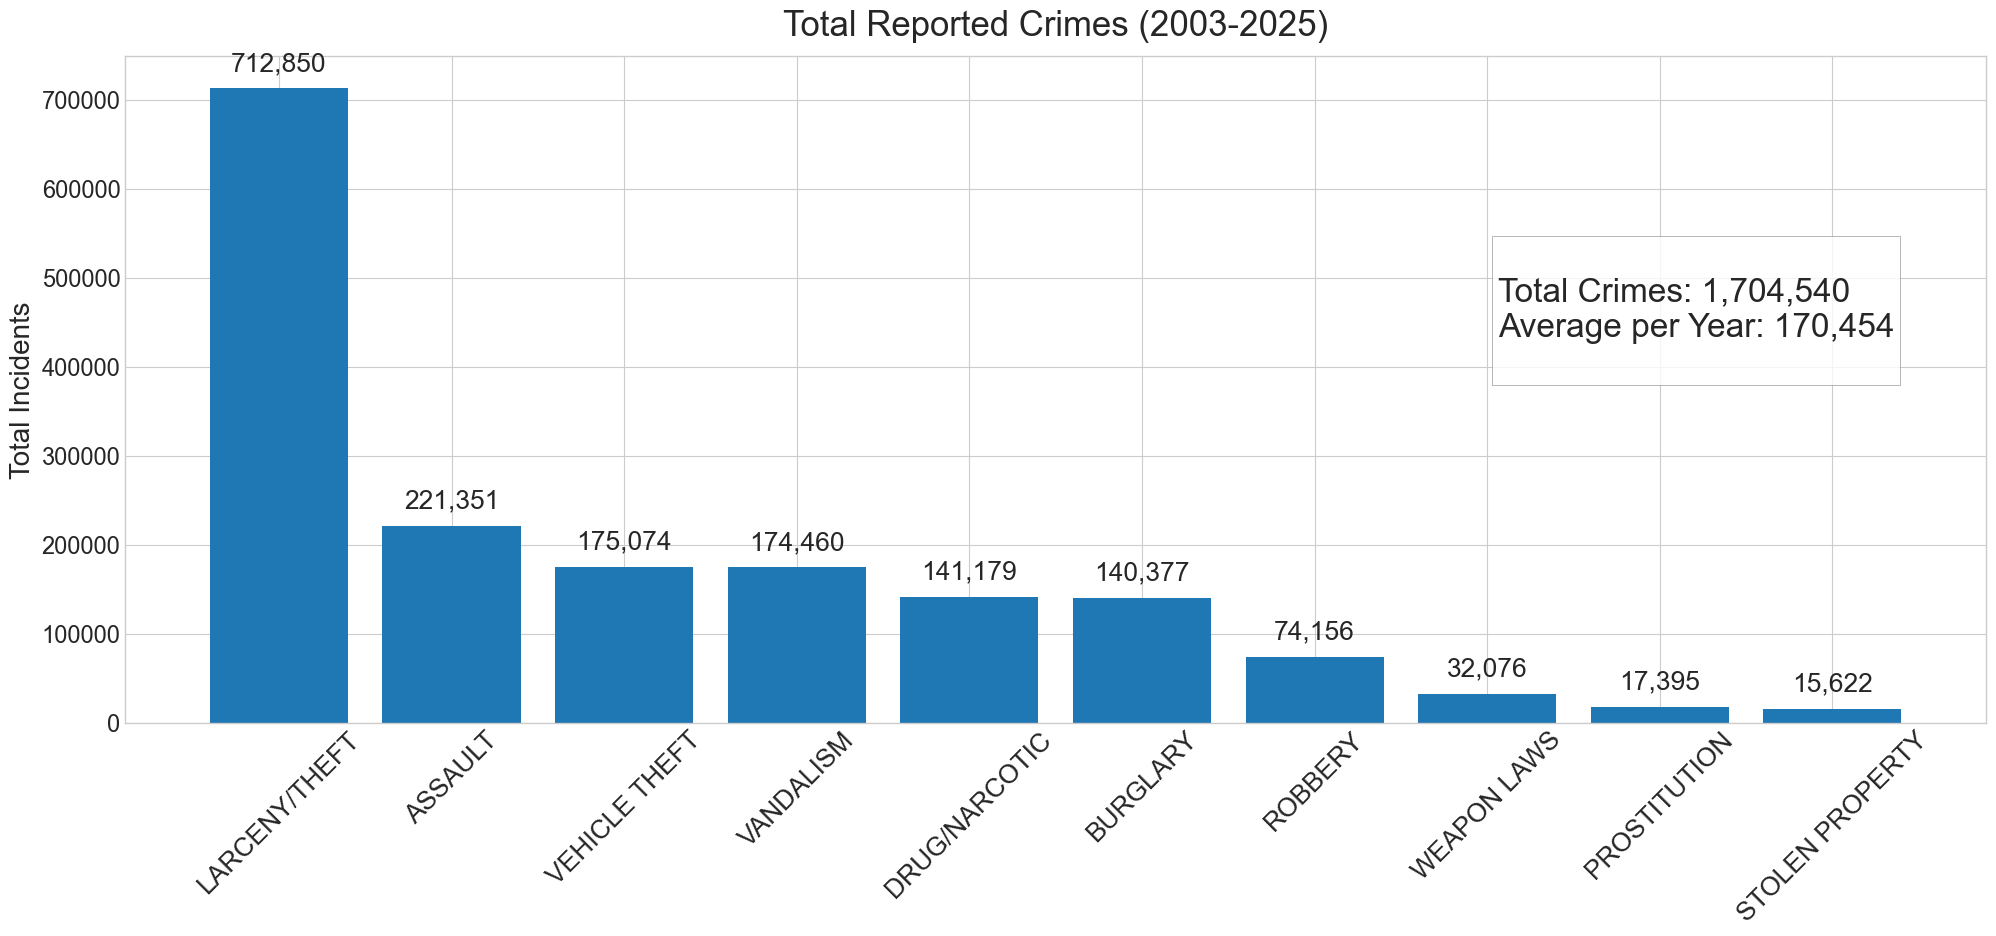

In [4]:
# Get crime counts by category
crime_counts = df['Category'].value_counts()
focuscrimes = set(['ROBBERY', 'VEHICLE THEFT', 'ASSAULT', 'BURGLARY', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 'WEAPON LAWS', 'PROSTITUTION', 'STOLEN PROPERTY'])
focus_data = df[df['Category'].isin(focuscrimes)]

# Create a color palette for each crime type - getting just the first color (blue) from tab10
crime_palette = sns.color_palette("tab10")[0]  # This gets the first color (blue) from tab10

# Use a cleaner style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with proper spacing
fig = plt.figure(figsize=(20, 25))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

# ----------------------------------
# 1. Top Plot - Overall Trend
# ----------------------------------
ax1 = fig.add_subplot(3, 1, 1)

# Use the specific blue color from tab10 palette for all bars
ax1.bar(crime_counts.index, crime_counts.values, color=crime_palette)

ax1.set_title('Total Reported Crimes (2003-2025)', fontsize=25, pad=15)
ax1.set_ylabel('Total Incidents', fontsize=20)
plt.xticks(rotation=45)

#set y-axis text size
ax1.tick_params(axis='y', labelsize=17)
ax1.tick_params(axis='x', labelsize=19)

# Add data labels
for i, v in enumerate(crime_counts.values):
    ax1.text(i, v + (0.02 * crime_counts.max()), f"{v:,}",
        ha='center', va='bottom',
        fontsize=19, bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))

# Statistics box
stats_text = f"""
Total Crimes: {crime_counts.sum():,}
Average per Year: {crime_counts.mean():,.0f}
"""
plt.gcf().text(0.75, 0.85, stats_text, fontsize=24,
              bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

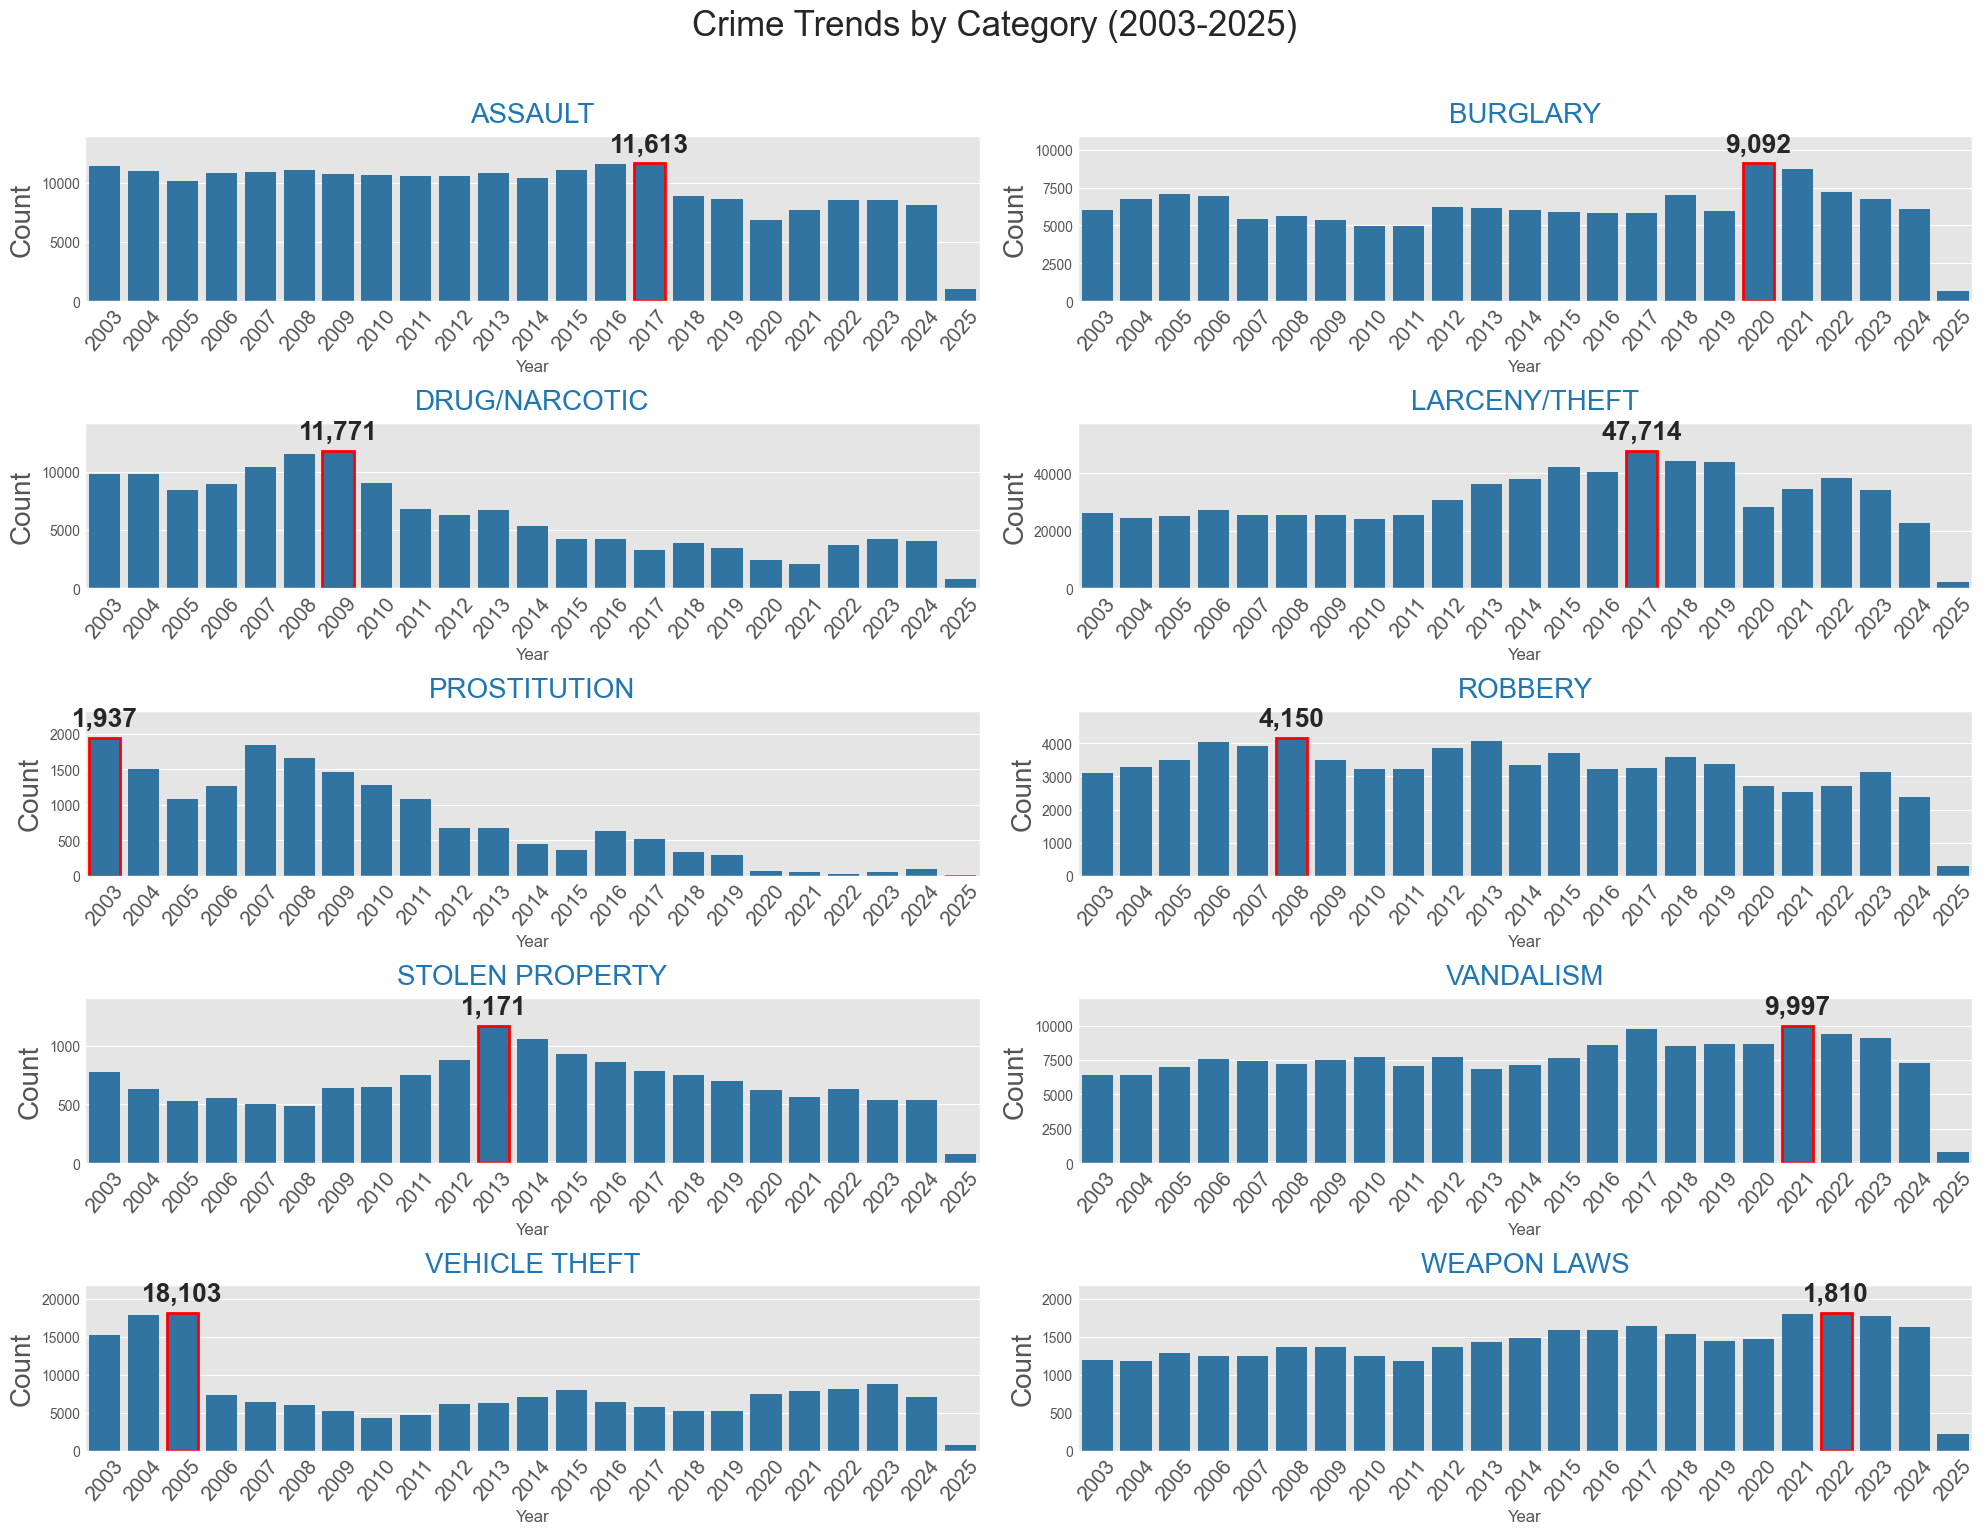

In [5]:
# Plot 2 - By Category Breakdown
plt.style.use('ggplot')
plt.rcParams['font.size'] = 10
# Create a color palette for each crime type
crime_palette = sns.color_palette("tab10")[0]
fig2 = plt.figure(figsize=(20, 15))
fig2.subplots_adjust(hspace=0.6, wspace=0.3)
for idx, crime in enumerate(sorted(focuscrimes), 1):
    ax = fig2.add_subplot(5, 2, idx)  # 5 rows, 2 columns
   
    crime_data = focus_data[focus_data['Category'] == crime]
    if not crime_data.empty:
        yearly_counts = crime_data['Year'].value_counts().sort_index()
       
        # Use the specific color for this crime type
        sns.barplot(x=yearly_counts.index.astype(str),
                    y=yearly_counts.values,
                    ax=ax,
                    color=crime_palette)
       
        y_max = yearly_counts.max() * 1.2
        ax.set_ylim(0, y_max if not np.isnan(y_max) else 1000)
       
        ax.set_title(crime, fontsize=20, pad=10, color=crime_palette)
        ax.set_ylabel('Count', fontsize=20)
        plt.xticks(rotation=50, fontsize=15)
       
        # Find the highest crime year
        if not yearly_counts.empty:
            max_year_idx = yearly_counts.argmax()
            max_year = yearly_counts.index[max_year_idx]
            max_count = yearly_counts.max()
            
            # Find the corresponding patch (bar) to annotate
            # The bar index matches the position in the sorted yearly_counts
            max_bar_idx = yearly_counts.index.get_loc(max_year)
            
            # Annotate only the highest bar
            bar = ax.patches[max_bar_idx]
            ax.annotate(f"{int(max_count):,}",
                       (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                       ha='center', va='bottom',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=19,
                       weight='bold')
            
            # Optionally, you can highlight the highest year's bar with a different color or edge
            bar.set_edgecolor('red')
            bar.set_linewidth(2)
    else:
        ax.text(0.5, 0.5, f"No data for {crime}",
               ha='center', va='center', fontsize=12)
        ax.set_title(crime, fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
plt.suptitle('Crime Trends by Category (2003-2025)', y=1.02, fontsize=25)
plt.tight_layout()
plt.show()

In [6]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# 1. SAFEST POSSIBLE DATA CLEANING
def clean_crime_data(df):
    """Bulletproof data preparation that absolutely cannot raise split() errors"""
    # Make copy to avoid modifying original
    df_clean = df.copy()
    
    # Convert ALL categories to strings safely (no split() used)
    df_clean['Category'] = df_clean['Category'].astype(str)
    
    # Replace any residual float-looking strings
    df_clean['Category'] = df_clean['Category'].apply(
        lambda x: 'Unknown' if x.lower() in ['nan', 'none', ''] else x
    )
    
    # Simple title case conversion (no string splitting)
    df_clean['Category'] = df_clean['Category'].str.title()
    
    # Clean coordinates
    df_clean = df_clean.dropna(subset=['Latitude', 'Longitude'])
    df_clean = df_clean[
        (df_clean['Latitude'].between(37.7, 37.81)) & 
        (df_clean['Longitude'].between(-122.52, -122.35))
    ]
    return df_clean

# 2. HEATMAP GENERATION (NO STRING PROCESSING)
def create_sf_heatmap(df):
    """Creates heatmap using ONLY numerical coordinates"""
    m = folium.Map(location=[37.7749, -122.4194], 
                  zoom_start=13,
                  tiles='CartoDB positron')
    
    # HeatMap only needs coordinates - guaranteed floats
    HeatMap(
        df[['Latitude', 'Longitude']].values,
        radius=10,
        blur=15,
        min_opacity=0.5,
        gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 1: 'red'}
    ).add_to(m)
    
    return m

# 3. EXECUTION WITH FULL PROTECTION
try:
    
    # Clean data - THIS CANNOT FAIL with split() errors
    clean_df = clean_crime_data(df)
    
    # Create map - THIS ONLY USES COORDINATES
    crime_map = create_sf_heatmap(clean_df)
    
    # Save result
    crime_map.save('sf_crime_heatmap_guaranteed.html')
    print("SUCCESS! Map saved to 'sf_crime_heatmap_guaranteed.html'")
    
    # Display if in notebook
    from IPython.display import display
    display(crime_map)

except Exception as e:
    print(f"UNEXPECTED ERROR: {str(e)}")
    print("\nFINAL DATA CHECK:")
    print("Data types:\n", clean_df.dtypes)
    print("\nFirst 2 rows:\n", clean_df.head(2))

UNEXPECTED ERROR: 'float' object has no attribute 'split'

FINAL DATA CHECK:
Data types:
 Category       object
PdDistrict     object
Longitude     float64
Latitude      float64
TimeOfDay       int64
DayOfWeek      object
DayOfMonth      int64
Month          object
Year            int64
dtype: object

First 2 rows:
   Category PdDistrict   Longitude   Latitude  TimeOfDay DayOfWeek  DayOfMonth  \
0  Robbery  INGLESIDE -122.420084  37.708311         17    Monday          22   
3  Assault   SOUTHERN -122.410541  37.770913         17    Sunday          21   

      Month  Year  
0  November  2004  
3  November  2010  
